## Exploratory Data Analysis on Network Traffic Data
Manas Dasgupta, June 25

#### Data Preprocessing

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv("network_traffic_sample.csv", parse_dates=['timestamp'])

# View structure
df.head()

,timestamp,src_ip,dst_ip,protocol,src_port,dst_port,packet_size,flags,duration,is_malicious
0,2025-06-08 06:33:00.097090,157.151.189.28,164.90.229.3,TCP,58916,3905,597,FIN,2.00,0
1,2025-06-08 14:11:00.097090,99.241.126.161,117.44.69.100,TCP,24827,1040,237,RST,1.17,0
2,2025-06-07 15:48:00.097090,80.59.235.2,82.139.49.135,TCP,59594,6522,614,FIN,2.98,0
3,2025-06-08 01:02:00.097090,187.153.181.113,200.223.83.201,TCP,41459,938,589,PSH,1.86,1
4,2025-06-08 13:38:00.097090,80.207.12.99,63.227.67.5,TCP,37299,1537,96,PSH,3.62,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     50 non-null     datetime64[ns]
 1   src_ip        50 non-null     object        
 2   dst_ip        50 non-null     object        
 3   protocol      50 non-null     object        
 4   src_port      50 non-null     int64         
 5   dst_port      50 non-null     int64         
 6   packet_size   50 non-null     int64         
 7   flags         50 non-null     object        
 8   duration      50 non-null     float64       
 9   is_malicious  50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 4.0+ KB


In [8]:
# Handle missing values
df.isnull().sum()

timestamp       0
src_ip          0
dst_ip          0
protocol        0
src_port        0
dst_port        0
packet_size     0
flags           0
duration        0
is_malicious    0
dtype: int64

In [10]:
# Drop or impute
df['duration'].fillna(df['duration'].median(), inplace=True)

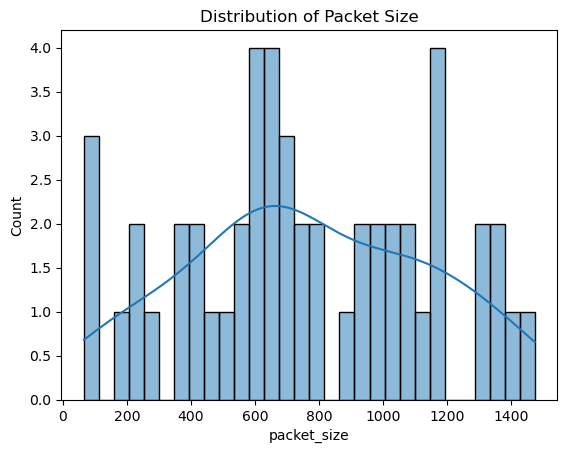

In [12]:
# Distribution of Packet Sizes

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['packet_size'], kde=True, bins=30)
plt.title("Distribution of Packet Size")
plt.show()

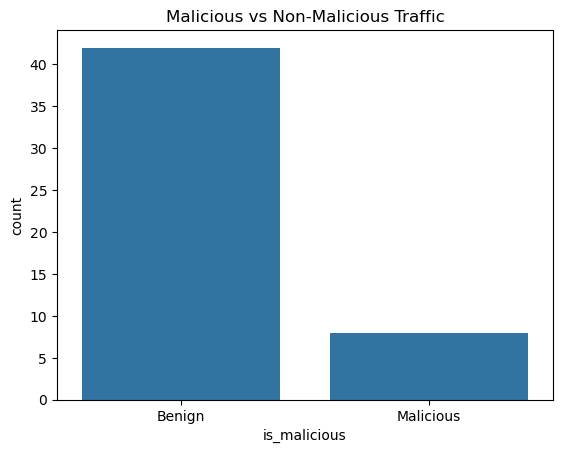

In [14]:
# 2. Malicious vs Non-Malicious Distribution
sns.countplot(data=df, x='is_malicious')
plt.title("Malicious vs Non-Malicious Traffic")
plt.xticks([0, 1], ['Benign', 'Malicious'])
plt.show()

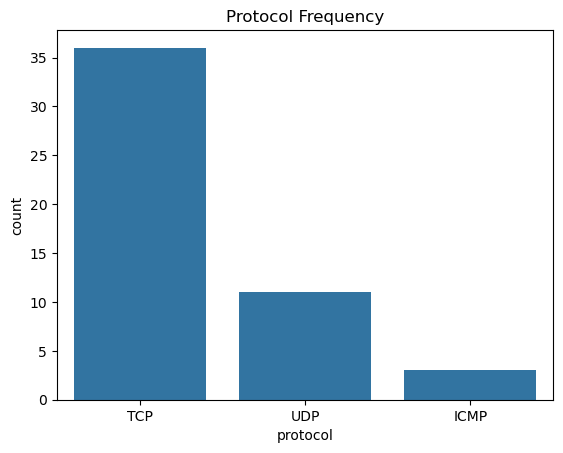

In [16]:
# Protocol Usage

sns.countplot(data=df, x='protocol', order=df['protocol'].value_counts().index)
plt.title("Protocol Frequency")
plt.show()

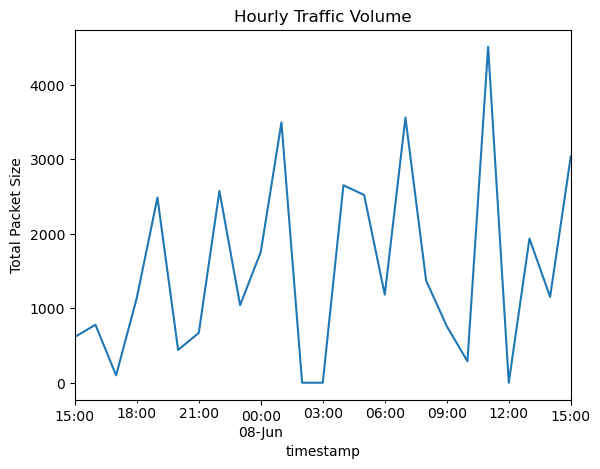

In [18]:
# 4. Time trend of traffic volume
df.set_index('timestamp').resample('1H')['packet_size'].sum().plot()
plt.title("Hourly Traffic Volume")
plt.ylabel("Total Packet Size")
plt.show()

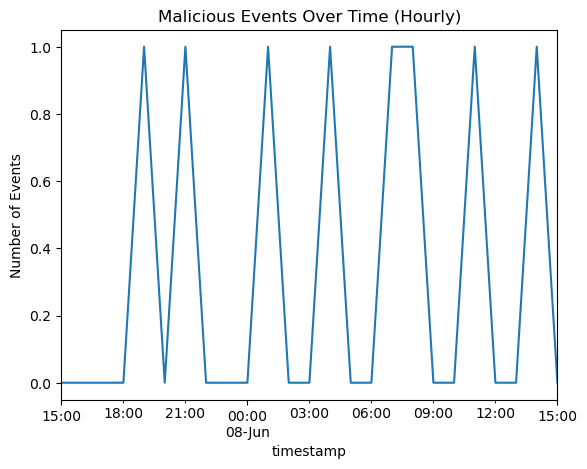

In [20]:
# Time-based Analysis

df.set_index('timestamp')['is_malicious'].resample('H').sum().plot()
plt.title("Malicious Events Over Time (Hourly)")
plt.ylabel("Number of Events")
plt.show()

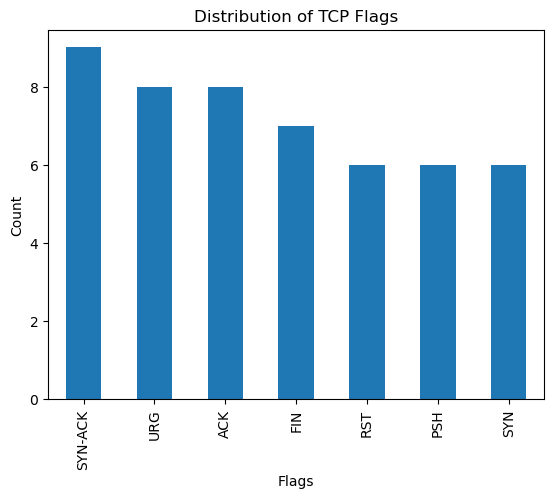

In [22]:
# TCP Flag Patterns

flag_counts = df['flags'].value_counts()
flag_counts.plot(kind='bar')
plt.title("Distribution of TCP Flags")
plt.xlabel("Flags")
plt.ylabel("Count")
plt.show()

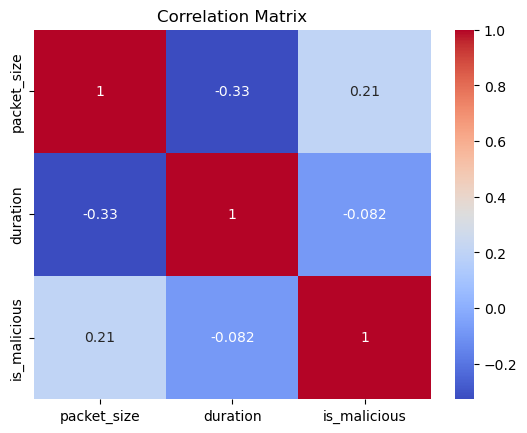

In [24]:
# Correlation Matrix

corr = df[['packet_size', 'duration', 'is_malicious']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

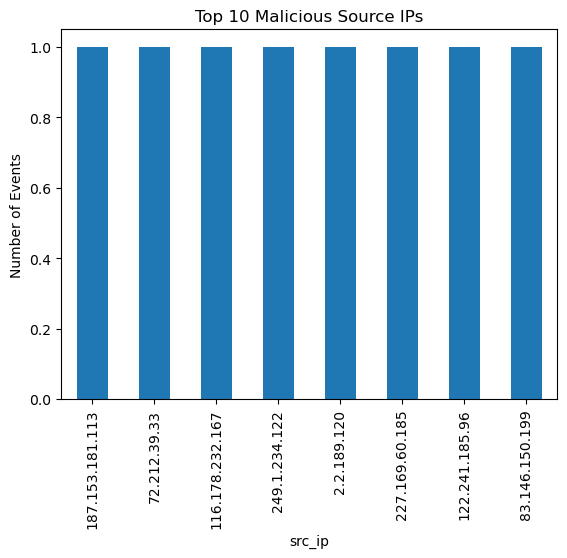

In [26]:
# Top IPs Associated with Attacks

malicious_ips = df[df['is_malicious'] == 1]['src_ip'].value_counts().head(10)
malicious_ips.plot(kind='bar')
plt.title("Top 10 Malicious Source IPs")
plt.ylabel("Number of Events")
plt.show()